# 了解Dcard留學版熱門話題，爬蟲並製作成文字雲

Building prefix dict from /Users/jimmyfu87/JupyterNotebook/附檔/dict.txt ...
Loading model from cache /var/folders/0z/m56lmfcx0jbbqtl463rgsh_r0000gn/T/jieba.uc290c0fc5f6ec2632cf8586795e26ea5.cache
Loading model cost 0.675 seconds.
Prefix dict has been built successfully.


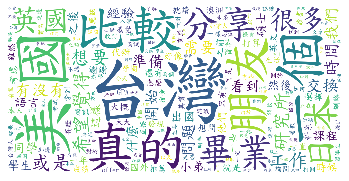

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud ,STOPWORDS
import jieba

#移除不重要、或一定會出現的詞
drop_elements=["也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對",
                             "就", '\n','越','為','這種','多','越來','大家','因為','所以','目前','可以','學校','大學',
                             '申請','最近','一下','請問','現在','還是','知道','但是','自己','如果','已經','今年',
                '留學','今年','沒有','各位','這個',' ' ]
def webcrawl():
        container=''
        add=''
        #取得5000篇文章
        for i in range(50):
            url = 'https://www.dcard.tw/_api/forums/studyabroad/posts?&limit=100'+add
            resp = requests.get(url) #回傳為一個request.Response的物件
            r=resp.json()
            for i in range(len(r)):
                container+=r[i]['excerpt']
                id=r[i]['id']
            add='&before='+str(id)
        #print(container)
        return(container)

def wordcloud(text):
    file_path='/Users/jimmyfu87/JupyterNotebook/附檔/dict.txt'
    font_path='/Users/jimmyfu87/JupyterNotebook/附檔/kaiu.ttf'
    jieba.set_dictionary(file_path)
#     jieba.load_userdict(file_path)
    wordlist = jieba.lcut(text,cut_all=False)
    unique_string=' '.join(wordlist) 
    #print(unique_string)
    
    stopwords = {}.fromkeys(drop_elements)
    
    wordcloud = WordCloud(font_path=font_path,
                          max_words=200,background_color='white',
                          stopwords=stopwords,
                          width = 1000, height = 500)
    wordcloud.generate(unique_string)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
def counting(text):
    file_path='/Users/jimmyfu87/JupyterNotebook/附檔/dict.txt'
    #設定中文編碼
    jieba.set_dictionary(file_path)
    word_list = jieba.lcut(text,cut_all=False)
    seg_df = pd.DataFrame(word_list,columns=['word'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('word')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

# webcrawl()
text=webcrawl()
wordcloud(text)

In [2]:
count=counting(text)
drop=['，', '的', ' ', '我', '是', '了', '在', '有', '/', '申請','去', '想', '都', '學校', '也', '。', '？', '大家', '但', '不',
     '（', '要', '跟', '好', '目前', '說', '）', '可以', '嗎', '人','因為','就', '一下', '大學', '很', '請問', '再','最近',
     '會', '已經', '沒有', '！','、','：','～']
# count.index
count_drop=count.drop(index=drop)
count_drop.head(20)

Building prefix dict from /Users/jimmyfu87/JupyterNotebook/附檔/dict.txt ...
Loading model from cache /var/folders/0z/m56lmfcx0jbbqtl463rgsh_r0000gn/T/jieba.uc290c0fc5f6ec2632cf8586795e26ea5.cache
Loading model cost 0.620 seconds.
Prefix dict has been built successfully.


,count
word,
上,989
知道,917
月,911
各位,891
台灣,884
到,881
所以,866
留學,850
有沒有,810
